In [ ]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import io

In [ ]:
url = 'https://raw.githubusercontent.com/RuiXiWangTW/subject-object/main/results/long_names/11272023_train-mixed_treebank-train_bert-base-uncased-index_balance_roles-AO_eval-en_ewt-ud-train_bert-base-uncased_localshuffle3-index.csv'
df1 = pd.read_csv(url)
# Dataset is now stored in a Pandas Dataframe

<ipython-input-2-6f0def453fd8>:2: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  df1 = pd.read_csv(url)


In [ ]:
# categories = [row for row in df1]
# layers = df1[categories[-2]]
# probabilities = df1[categories[-1]]
# tokens =  df1[categories[2]]
# subjects = df1[categories[6]]
# objects = df1[categories[7]]
# print(categories)
# print(layers.values)
# print(df1[categories[3]].values)
# # print('\ns')
# # print(layers[23900])
# # print(layers[24000])
# # print('s\n')


# subj_lists = [[] for j in range(13)]
# obj_lists = [[] for j in range(13)]
# all_lists = [[] for j in range(13)]
# # print(all_lists)

# for i in range(23900, 179610):
# # for i in range(179610):

#   res_layer = layers[i]
#   res_prob = probabilities[i]
#   tok = tokens[i]
#   if res_layer != 'word_embeddings' and res_layer != 'position_embeddings':
#     ind = int(res_layer)
#     # print(ind)
#     subj = subjects[i]
#     obj = objects[i]
#     if tok == subj:
#       subj_lists[ind].append(res_prob)
#     elif tok == obj:
#       obj_lists[ind].append(res_prob)
#     else:
#       all_lists[ind].append(res_prob)



# # print(df1[categories[-2]])
# # print(df1[categories[-1]])
# # print(df1[categories[6]])
# # print(df1[categories[7]])
# # print(df1[categories[3]])

# probA_list = []
# oppProb = []
# for z in range(13):
#   Aavg = np.average(subj_lists[z])
#   OppAvg = np.average(obj_lists[z])
#   probA_list.append(Aavg)
#   oppProb.append(OppAvg)

# # for z_list in all_lists:
# #   avg = np.average(z_list)
# #   probA_list.append(avg)
# #   oppProb.append(1-avg)

# print(probA_list)
# print(oppProb)
# print(all_lists)
# layerVals = [0,1,2,3,4,5,6,7,8,9,10,11,12]

# plt.plot(layerVals, probA_list, label='Subject')
# plt.plot(layerVals, oppProb, label='Object')
# plt.ylabel("Avg. Probe P(Subject)")
# plt.xlabel("Layer")
# plt.xticks(layerVals)
# plt.legend(title="Grammatical Role")


In [ ]:
original_url = 'https://raw.githubusercontent.com/RuiXiWangTW/subject-object/main/results/long_names/11272023_train-mixed_treebank-train_bert-base-uncased-index_balance_roles-AO_eval-argument-swapped-original_bert-base-uncased-index.csv'
df2 = pd.read_csv(original_url)

['Unnamed: 0', 'token', 'sent_id', 'role', 'subject_word', 'object_word', 'verb_word', 'word_index', 'layer', 'probability_A']
[0.6519497767155552, 0.7381617131748156, 0.8478263271683507, 0.8715408873347151, 0.8796582751365492, 0.9357251971754622, 0.9505294657214125, 0.9570738758536345, 0.9726611720190355, 0.9679729850956995, 0.9612722018568163, 0.9465516348589731, 0.9449726845422334, 0.9358470688554023]
[0.42877037857040207, 0.294541578317711, 0.14620287422585504, 0.12977442064418612, 0.06799409486915871, 0.04839316466059597, 0.02759774435912271, 0.026116640587199553, 0.0166088438417293, 0.014225058381038535, 0.020515557967701322, 0.03220038641955295, 0.044860334954593704, 0.05573657984639877]
[[], [], [], [], [], [], [], [], [], [], [], [], [], []]


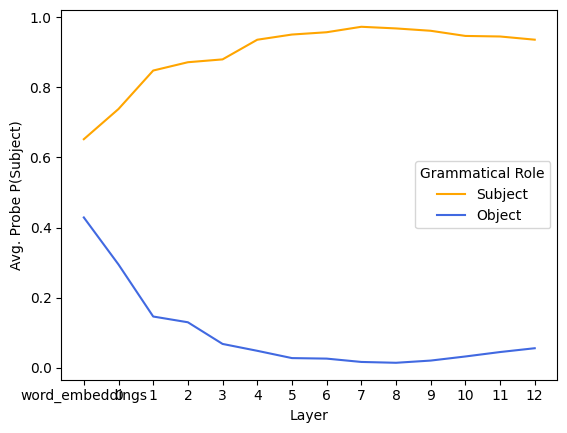

In [ ]:
categories = [row for row in df2]
layers = df2[categories[-2]]
probabilities = df2[categories[-1]]
tokens =  df2[categories[1]]
subjects = df2[categories[4]]
objects = df2[categories[5]]
print(categories)
# print(len(layers))
# print(layers[14500])
# print(layers[1900])

subj_lists = [[] for j in range(14)]
obj_lists = [[] for j in range(14)]
all_lists = [[] for j in range(14)]
# print(all_lists)

for i in range(14580):
# for i in range(179610):

  res_layer = layers[i]
  res_prob = probabilities[i]
  tok = tokens[i]
  # if res_layer != 'word_embeddings' and res_layer != 'position_embeddings':
  if res_layer == 'word_embeddings':
    ind = 0
  elif res_layer != 'position_embeddings':
    ind = int(res_layer)+1
  else:
    ind = -1
    # print(ind)
  if ind != -1:
    subj = subjects[i]
    obj = objects[i]
    if tok == subj:
      subj_lists[ind].append(res_prob)
    elif tok == obj:
      obj_lists[ind].append(res_prob)
    else:
      all_lists[ind].append(res_prob)



# print(df1[categories[-2]])
# print(df1[categories[-1]])
# print(df1[categories[6]])
# print(df1[categories[7]])
# print(df1[categories[3]])

probA_list = []
oppProb = []
for z in range(14):
  Aavg = np.average(subj_lists[z])
  OppAvg = np.average(obj_lists[z])
  probA_list.append(Aavg)
  oppProb.append(OppAvg)

# for z_list in all_lists:
#   avg = np.average(z_list)
#   probA_list.append(avg)
#   oppProb.append(1-avg)

print(probA_list)
print(oppProb)
print(all_lists)
layerVals = ['word_embeddings', '0','1','2','3','4','5','6','7','8','9','10','11','12']

plt.plot(layerVals, probA_list, label='Subject', color='orange')
plt.plot(layerVals, oppProb, label='Object', color='royalblue')
plt.ylabel("Avg. Probe P(Subject)")
plt.xlabel("Layer")
plt.xticks(layerVals)
plt.legend(title="Grammatical Role")


In [ ]:
swapped_url = 'https://raw.githubusercontent.com/RuiXiWangTW/subject-object/main/results/long_names/11272023_train-mixed_treebank-train_bert-base-uncased-index_balance_roles-AO_eval-argument-swapped-swapped_bert-base-uncased-index.csv'
df3 = pd.read_csv(swapped_url)

['Unnamed: 0', 'token', 'sent_id', 'role', 'subject_word', 'object_word', 'verb_word', 'word_index', 'layer', 'probability_A']
14580
[0.43252508436636294, 0.5387159612108507, 0.7867174760524221, 0.7968050020938766, 0.8016853487512341, 0.8882862423976142, 0.9085921283279172, 0.9406398329508259, 0.9560499265756367, 0.9601337135230995, 0.9639100029273424, 0.9371179341756706, 0.9434442911634489, 0.9284238410039247]
[0.6509208434953607, 0.5532244508051931, 0.2418296428136569, 0.34456350116218665, 0.22299014677674214, 0.121447031974377, 0.1210318529093389, 0.09480970709445348, 0.07050917741708893, 0.0350022288521231, 0.04617963059623919, 0.05312536099264467, 0.07304331865923863, 0.07664424187877308]
[[], [], [], [], [], [], [], [], [], [], [], [], [], []]


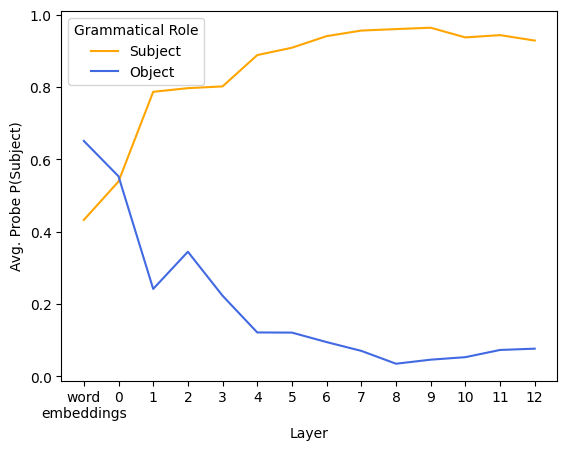

In [ ]:
categories = [row for row in df3]
layers = df3[categories[-2]]
probabilities = df3[categories[-1]]
tokens =  df3[categories[1]]
subjects = df3[categories[4]]
objects = df3[categories[5]]
print(categories)
print(len(layers))
# print(layers[14500])
# print(layers[1900])

subj_lists = [[] for j in range(14)]
obj_lists = [[] for j in range(14)]
all_lists = [[] for j in range(14)]
# print(all_lists)

# for i in range(1900, 14580):
# # for i in range(179610):

#   res_layer = layers[i]
#   res_prob = probabilities[i]
#   tok = tokens[i]
#   if res_layer != 'word_embeddings' and res_layer != 'position_embeddings':
#     ind = int(res_layer)
#     # print(ind)
#     subj = subjects[i]
#     obj = objects[i]
#     if tok == subj:
#       subj_lists[ind].append(res_prob)
#     elif tok == obj:
#       obj_lists[ind].append(res_prob)
#     else:
#       all_lists[ind].append(res_prob)

for i in range(14580):
# for i in range(179610):

  res_layer = layers[i]
  res_prob = probabilities[i]
  tok = tokens[i]
  # if res_layer != 'word_embeddings' and res_layer != 'position_embeddings':
  if res_layer == 'word_embeddings':
    ind = 0
  elif res_layer != 'position_embeddings':
    ind = int(res_layer)+1
  else:
    ind = -1
    # print(ind)
  if ind != -1:
    subj = subjects[i]
    obj = objects[i]
    if tok == subj:
      subj_lists[ind].append(res_prob)
    elif tok == obj:
      obj_lists[ind].append(res_prob)
    else:
      all_lists[ind].append(res_prob)



# print(df1[categories[-2]])
# print(df1[categories[-1]])
# print(df1[categories[6]])
# print(df1[categories[7]])
# print(df1[categories[3]])

probA_list_2 = []
oppProb_2 = []
for z in range(14):
  Aavg = np.average(subj_lists[z])
  OppAvg = np.average(obj_lists[z])
  probA_list_2.append(Aavg)
  oppProb_2.append(OppAvg)

# for z_list in all_lists:
#   avg = np.average(z_list)
#   probA_list.append(avg)
#   oppProb.append(1-avg)

print(probA_list_2)
print(oppProb_2)
print(all_lists)
# layerVals = [0,1,2,3,4,5,6,7,8,9,10,11,12]
layerVals = ['word\nembeddings', '0','1','2','3','4','5','6','7','8','9','10','11','12']


plt.plot(layerVals, probA_list_2, label='Subject', color='orange')
plt.plot(layerVals, oppProb_2, label='Object', color='royalblue')
plt.ylabel("Avg. Probe P(Subject)")
plt.xlabel("Layer")
plt.xticks(layerVals)
plt.legend(title="Grammatical Role")


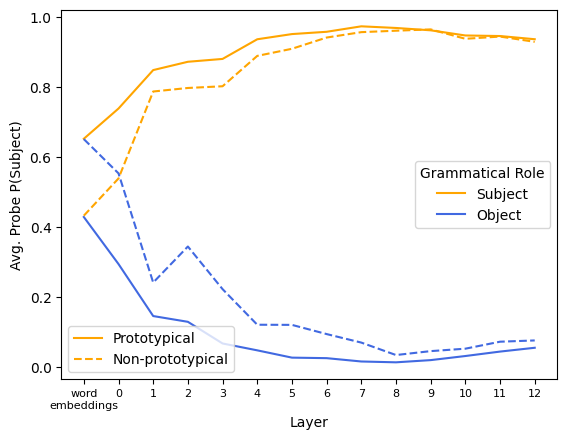

In [ ]:
plt.plot(layerVals, probA_list, label='Subject', color='orange')
plt.plot(layerVals, oppProb, label='Object', color='royalblue')
# plt.ylabel("Avg. Probe P(Subject)")
# plt.xlabel("Layer")
# plt.xticks(layerVals)
# plt.legend(title="Grammatical Role")

plt.plot(layerVals, probA_list_2, '--', label='Subject2', color='orange')
plt.plot(layerVals, oppProb_2, '--', label='Object2', color='royalblue')
plt.ylabel("Avg. Probe P(Subject)")
plt.xlabel("Layer")
plt.xticks(layerVals, fontsize='8')
plt.legend(title="Grammatical Role")


lines = plt.gca().get_lines()
include = [0,1]
legend1 = plt.legend([lines[i] for i in include],[lines[i].get_label() for i in include], loc=5, title="Grammatical Role")
legend2 = plt.legend([lines[i] for i in [0,2]],['Prototypical','Non-prototypical'], loc=3, labelcolor='black')
plt.gca().add_artist(legend1)

In [ ]:
from google.colab import files
uploaded = files.upload() ##results-combined.csv from drive folder

Saving results-combined.csv to results-combined.csv


In [ ]:
df0 = pd.read_csv(io.BytesIO(uploaded['results-combined.csv']))

['Unnamed: 0', 'token', 'sent_id', 'role', 'subject_word', 'object_word', 'verb_word', 'word_index', 'layer', 'probability_A']
2968
[0.6178890442541041, 0.651545982636584, 0.8416812912331775, 0.8748514856037188, 0.936074389617178, 0.9225934152929188, 0.9458157362659753, 0.9588562164788551, 0.9885585814117457, 0.9992665457224488, 0.9864967205333259, 0.9855264424590472, 0.9859084296863451, 0.9850619447855927]
[0.6178890442541041, 0.5119543434536943, 0.18979278516382733, 0.32354861863136053, 0.16130997332839994, 0.07132342735612993, 0.07136118950688189, 0.029761617995474544, 0.022014053829421603, 0.014631807657668666, 0.04509731873309387, 0.08279249555839868, 0.11438952201168189, 0.13831351590554408]
[[], [], [], [], [], [], [], [], [], [], [], [], [], []]


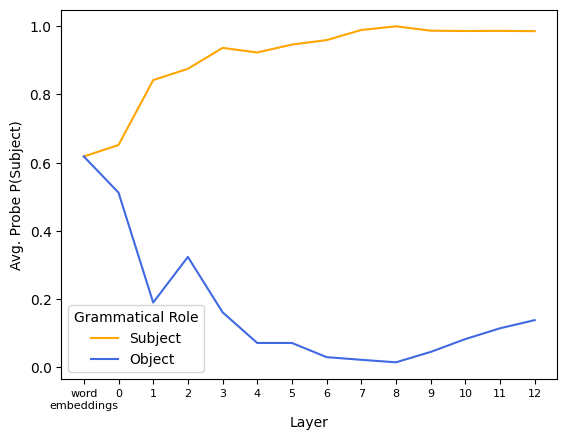

In [ ]:
categories = [row for row in df2]
layers = df0[categories[-2]]
probabilities = df0[categories[-1]]
tokens =  df0[categories[1]]
subjects = df0[categories[4]]
objects = df0[categories[5]]
print(categories)
print(len(layers))
# print(layers[14500])
# print(layers[1900])

subj_lists = [[] for j in range(14)]
obj_lists = [[] for j in range(14)]
all_lists = [[] for j in range(14)]
# print(all_lists)

for i in range(2968):
# for i in range(179610):

  res_layer = layers[i]
  res_prob = probabilities[i]
  tok = tokens[i].lower()
  # if res_layer != 'word_embeddings' and res_layer != 'position_embeddings':
  if res_layer == 'word_embeddings':
    ind = 0
  elif res_layer != 'position_embeddings':
    ind = int(res_layer)+1
  else:
    ind = -1
    # print(ind)
  if ind != -1:
    subj = subjects[i].lower()
    obj = objects[i].lower()
    if tok == subj:
      subj_lists[ind].append(res_prob)
    elif tok == obj:
      obj_lists[ind].append(res_prob)
    else:
      print(tok,subj, obj)
      all_lists[ind].append(res_prob)



# print(df1[categories[-2]])
# print(df1[categories[-1]])
# print(df1[categories[6]])
# print(df1[categories[7]])
# print(df1[categories[3]])

probA_list = []
oppProb = []
for z in range(14):
  Aavg = np.average(subj_lists[z])
  OppAvg = np.average(obj_lists[z])
  probA_list.append(Aavg)
  oppProb.append(OppAvg)

# for z_list in all_lists:
#   avg = np.average(z_list)
#   probA_list.append(avg)
#   oppProb.append(1-avg)

print(probA_list)
print(oppProb)
print(all_lists)
layerVals = ['word\nembeddings', '0','1','2','3','4','5','6','7','8','9','10','11','12']

plt.plot(layerVals, probA_list, label='Subject', color='orange')
plt.plot(layerVals, oppProb, label='Object', color='royalblue')
plt.ylabel("Avg. Probe P(Subject)")
plt.xlabel("Layer")
plt.xticks(layerVals, fontsize='8')
plt.legend(title="Grammatical Role")


In [ ]:
original_url_2 = 'https://raw.githubusercontent.com/RuiXiWangTW/subject-object/main/results/long_names/11302023_train-mixed_treebank-train_bert-large-uncased-index_balance_roles-AO_eval-argument-swapped-original_bert-large-uncased-index.csv'
df4 = pd.read_csv(original_url_2)

In [ ]:
swapped_url_2 = 'https://raw.githubusercontent.com/RuiXiWangTW/subject-object/main/results/long_names/11302023_train-mixed_treebank-train_bert-large-uncased-index_balance_roles-AO_eval-argument-swapped-swapped_bert-large-uncased-index.csv'
df5 = pd.read_csv(swapped_url_2)

[0.592197558785463, 0.7177714412918071, 0.8081011571488129, 0.8308212200964502, 0.8141124798439429, 0.8655331864401917, 0.8909843662055069, 0.8775837708004448, 0.8704010113348494, 0.8297754596059923, 0.8715651658719012, 0.9034894742512675, 0.9297956745084485, 0.9402657760554335]
[0.38033874108455834, 0.2837306730390377, 0.22460544181314035, 0.22546795772486677, 0.19981814851254892, 0.11926542378729418, 0.11347560925246061, 0.13315663018317714, 0.13437124150046548, 0.11177881444160043, 0.1485351598113184, 0.0984811337087268, 0.03857292154317099, 0.031853293837119136]
[[], [], [], [], [], [], [], [], [], [], [], [], [], []]


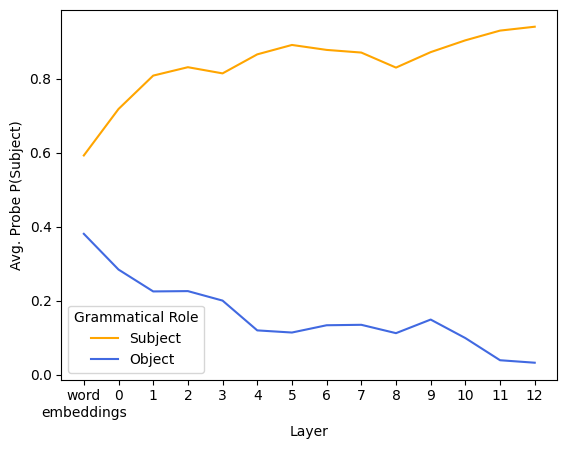

In [ ]:
categories = [row for row in df4]
layers = df4[categories[-2]]
probabilities = df4[categories[-1]]
tokens =  df4[categories[1]]
subjects = df4[categories[4]]
objects = df4[categories[5]]
# print(categories)
# print(len(layers))

subj_lists = [[] for j in range(14)]
obj_lists = [[] for j in range(14)]
all_lists = [[] for j in range(14)]


for i in range(14580):

  res_layer = layers[i]
  res_prob = probabilities[i]
  tok = tokens[i]
  # if res_layer != 'word_embeddings' and res_layer != 'position_embeddings':
  if res_layer == 'word_embeddings':
    ind = 0
  elif res_layer != 'position_embeddings':
    ind = int(res_layer)+1
  else:
    ind = -1

  if ind != -1:
    subj = subjects[i]
    obj = objects[i]
    if tok == subj:
      subj_lists[ind].append(res_prob)
    elif tok == obj:
      obj_lists[ind].append(res_prob)
    else:
      all_lists[ind].append(res_prob)


probA_list_3 = []
oppProb_3 = []
for z in range(14):
  Aavg = np.average(subj_lists[z])
  OppAvg = np.average(obj_lists[z])
  probA_list_3.append(Aavg)
  oppProb_3.append(OppAvg)



print(probA_list_3)
print(oppProb_3)
print(all_lists)
# layerVals = [0,1,2,3,4,5,6,7,8,9,10,11,12]
layerVals = ['word\nembeddings', '0','1','2','3','4','5','6','7','8','9','10','11','12']


plt.plot(layerVals, probA_list_3, label='Subject', color='orange')
plt.plot(layerVals, oppProb_3, label='Object', color='royalblue')
plt.ylabel("Avg. Probe P(Subject)")
plt.xlabel("Layer")
plt.xticks(layerVals)
plt.legend(title="Grammatical Role")


[0.3834134751134138, 0.5500051237218173, 0.6889478660664644, 0.7188147925118471, 0.6924994068771415, 0.8145702676930866, 0.8238270992897773, 0.8252601995009335, 0.7874777662594036, 0.7342457073785481, 0.7706594602410916, 0.848348942998277, 0.8671387035498911, 0.8893471503402234]
[0.5917164158581237, 0.49882310312971145, 0.4084739116403183, 0.41744109919294403, 0.3636522063835469, 0.29747480260884474, 0.24762075293443458, 0.27782411420405295, 0.28546489303195194, 0.29603233276619484, 0.3292021673982617, 0.24387687068967417, 0.12066682634700959, 0.07804197215015946]
[[], [], [], [], [], [], [], [], [], [], [], [], [], []]


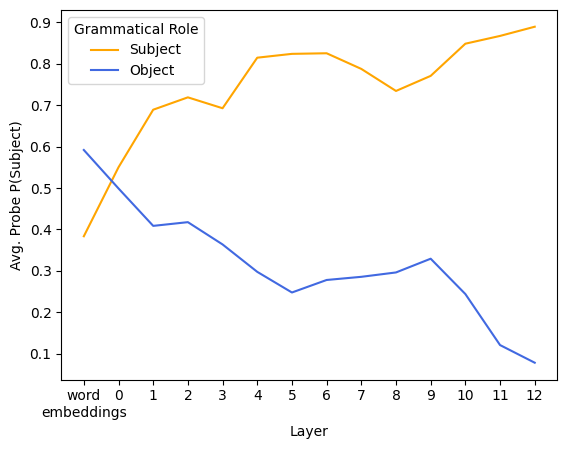

In [ ]:
categories = [row for row in df5]
layers = df5[categories[-2]]
probabilities = df5[categories[-1]]
tokens =  df5[categories[1]]
subjects = df5[categories[4]]
objects = df5[categories[5]]
# print(categories)
# print(len(layers))
# print(layers[14578])

subj_lists = [[] for j in range(14)]
obj_lists = [[] for j in range(14)]
all_lists = [[] for j in range(14)]


for i in range(14580):

  res_layer = layers[i]
  res_prob = probabilities[i]
  tok = tokens[i]
  # if res_layer != 'word_embeddings' and res_layer != 'position_embeddings':
  if res_layer == 'word_embeddings':
    ind = 0
  elif res_layer != 'position_embeddings':
    ind = int(res_layer)+1
  else:
    ind = -1

  if ind != -1:
    subj = subjects[i]
    obj = objects[i]
    if tok == subj:
      subj_lists[ind].append(res_prob)
    elif tok == obj:
      obj_lists[ind].append(res_prob)
    else:
      all_lists[ind].append(res_prob)



probA_list_4 = []
oppProb_4 = []
for z in range(14):
  Aavg = np.average(subj_lists[z])
  OppAvg = np.average(obj_lists[z])
  probA_list_4.append(Aavg)
  oppProb_4.append(OppAvg)


print(probA_list_4)
print(oppProb_4)
print(all_lists)
# layerVals = [0,1,2,3,4,5,6,7,8,9,10,11,12]
layerVals = ['word\nembeddings', '0','1','2','3','4','5','6','7','8','9','10','11','12']


plt.plot(layerVals, probA_list_4, label='Subject', color='orange')
plt.plot(layerVals, oppProb_4, label='Object', color='royalblue')
plt.ylabel("Avg. Probe P(Subject)")
plt.xlabel("Layer")
plt.xticks(layerVals)
plt.legend(title="Grammatical Role")


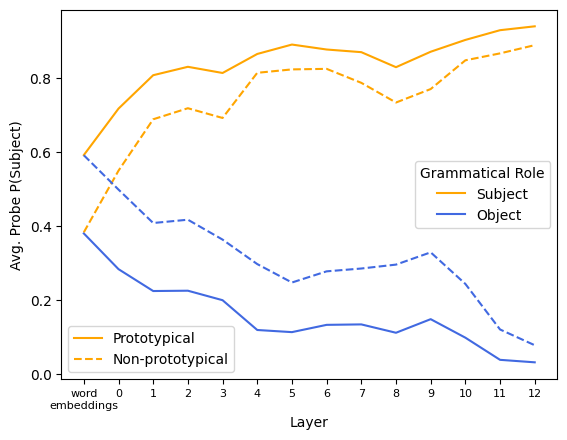

In [ ]:
plt.plot(layerVals, probA_list_3, label='Subject', color='orange')
plt.plot(layerVals, oppProb_3, label='Object', color='royalblue')
# plt.ylabel("Avg. Probe P(Subject)")
# plt.xlabel("Layer")
# plt.xticks(layerVals)
# plt.legend(title="Grammatical Role")

plt.plot(layerVals, probA_list_4, '--', label='Subject2', color='orange')
plt.plot(layerVals, oppProb_4, '--', label='Object2', color='royalblue')
plt.ylabel("Avg. Probe P(Subject)")
plt.xlabel("Layer")
plt.xticks(layerVals, fontsize='8')
plt.legend(title="Grammatical Role")


lines = plt.gca().get_lines()
include = [0,1]
legend1 = plt.legend([lines[i] for i in include],[lines[i].get_label() for i in include], loc=5, title="Grammatical Role")
legend2 = plt.legend([lines[i] for i in [0,2]],['Prototypical','Non-prototypical'], loc=3, labelcolor='black')
plt.gca().add_artist(legend1)

In [ ]:
original_url_2_our_data = 'https://raw.githubusercontent.com/RuiXiWangTW/subject-object/main/results/long_names/11302023_train-mixed_treebank-train_bert-large-uncased-index_balance_roles-AO_eval-object-subject-original_bert-large-uncased-index.csv'
df6 = pd.read_csv(original_url_2_our_data)
swapped_url_2_our_data = 'https://raw.githubusercontent.com/RuiXiWangTW/subject-object/main/results/long_names/11302023_train-mixed_treebank-train_bert-large-uncased-index_balance_roles-AO_eval-object-subject-switched_bert-large-uncased-index.csv'
df7 = pd.read_csv(swapped_url_2_our_data)

[0.6451617199576126, 0.7185589371752631, 0.7666466592814581, 0.8193995884905614, 0.7995975933420468, 0.9155405714123879, 0.9078045551421314, 0.9304974694859307, 0.9622859674207164, 0.9298257373695104, 0.9335627774574294, 0.9362538293662338, 0.9481794405747798, 0.9621382138256932]
[0.6519284140986373, 0.5361103006558757, 0.2799884500706315, 0.33780301288755726, 0.31441505718329377, 0.23247268859653694, 0.21418999995553525, 0.2722170653718055, 0.2607085058994154, 0.3061472802934263, 0.4308287134350046, 0.2290111077094068, 0.021709077355447817, 0.030358649112325733]
[[], [], [], [], [], [], [], [], [], [], [], [], [], []]


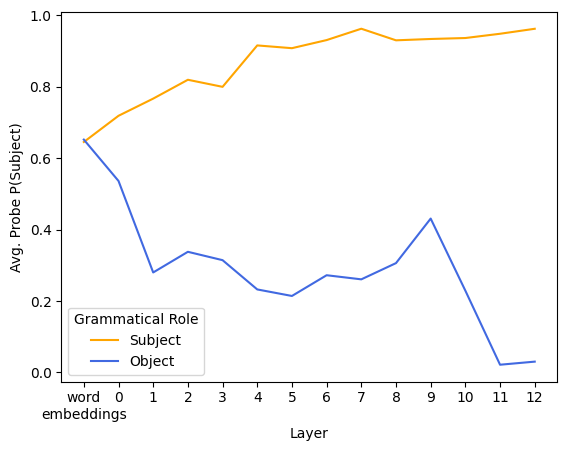

In [ ]:
categories = [row for row in df6]
layers = list(df6[categories[-2]])
layers.extend(df7[categories[-2]])
probabilities = list(df6[categories[-1]])
probabilities.extend(df7[categories[-1]])
tokens =  list(df6[categories[1]])
tokens.extend(df7[categories[1]])
subjects = list(df6[categories[4]])
subjects.extend(df7[categories[4]])
objects = list(df6[categories[5]])
objects.extend(df7[categories[5]])
# print(categories)
# print(len(layers))

subj_lists = [[] for j in range(14)]
obj_lists = [[] for j in range(14)]
all_lists = [[] for j in range(14)]


for i in range(1590):

  res_layer = layers[i]
  res_prob = probabilities[i]
  tok = tokens[i].lower()
  # if res_layer != 'word_embeddings' and res_layer != 'position_embeddings':
  if res_layer == 'word_embeddings':
    ind = 0
  elif res_layer != 'position_embeddings':
    ind = int(res_layer)+1
  else:
    ind = -1

  if ind != -1:
    subj = subjects[i].lower()
    obj = objects[i].lower()
    if tok == subj:
      subj_lists[ind].append(res_prob)
    elif tok == obj:
      obj_lists[ind].append(res_prob)
    else:
      all_lists[ind].append(res_prob)


probA_list_6 = []
oppProb_6 = []
for z in range(14):
  Aavg = np.average(subj_lists[z])
  OppAvg = np.average(obj_lists[z])
  probA_list_6.append(Aavg)
  oppProb_6.append(OppAvg)



print(probA_list_6)
print(oppProb_6)
print(all_lists)
# layerVals = [0,1,2,3,4,5,6,7,8,9,10,11,12]
layerVals = ['word\nembeddings', '0','1','2','3','4','5','6','7','8','9','10','11','12']


plt.plot(layerVals, probA_list_6, label='Subject', color='orange')
plt.plot(layerVals, oppProb_6, label='Object', color='royalblue')
plt.ylabel("Avg. Probe P(Subject)")
plt.xlabel("Layer")
plt.xticks(layerVals)
plt.legend(title="Grammatical Role")